In [2]:
library(ggplot2)
library(dplyr)

In [3]:
# Sampling space for a single fair-coin toss
s = c('H', 'T')

# Corresponding probabilities
p = c(0.5, 0.5)

nsimulations = 10
#sample(s, size = nsimulations, replace = TRUE, prob = p)

# Simulate the random experiment of tossing a single fair coin
nsimulations = 1e1
simulatedData = sample(s, size = nsimulations, replace = TRUE, prob = p)
print(simulatedData)
simulatedData == 'H'
# What fraction of times is a condition satisfied?
mean(simulatedData == 'H')
table(simulatedData)

 [1] "T" "H" "T" "T" "H" "H" "H" "T" "H" "H"


[1] FALSE  TRUE FALSE FALSE  TRUE  TRUE  TRUE FALSE  TRUE  TRUE

[1] 0.6

simulatedData
H T 
6 4 

In [4]:
s = c('H','T')
p = c(0.5,0.5)

nsimulations = 1e6
simulatedData = sample(s,size = nsimulations,replace = TRUE, prob = p)

mean(simulatedData == 'T')
mean(simulatedData == 'H')

table(simulatedData)

[1] 0.4997

[1] 0.5003

simulatedData
     H      T 
500300 499700 

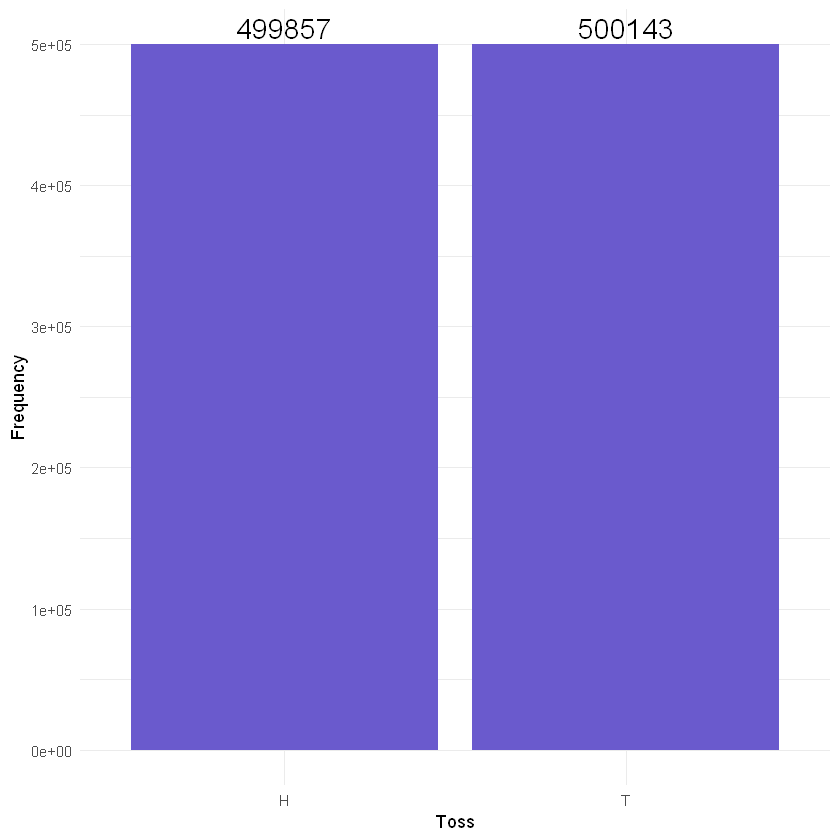

In [5]:
# Sampling space for a single fair-coin toss
s = c('H', 'T')

# Corresponding probabilities
p = c(0.5, 0.5)

# Simulate the random experiment of tossing a single fair coin
nsimulations = 1e6
simulatedData = sample(s, size = nsimulations, replace = TRUE, prob = p)

# Create dataframe comprising frequency of each possible outcome in the sample space
#table(simulatedData)
df= as.data.frame(table(simulatedData))
colnames(df) = c('Toss', 'Frequency')
#print(df)

# Frequency plot
p = ggplot(data = df, aes(x = Toss, y = Frequency)) +
  geom_bar(stat = 'identity', fill="slateblue") +
  geom_text(aes(label = Frequency), vjust = -0.3, size = 6)+
  theme_minimal()

p

In [6]:
# Sampling space for tossing two fair coins
s = c('H', 'T')

# Corresponding probabilities
p = c(0.5, 0.5)

# Simulate the random experiment of tossing two fair coins
nsimulations = 1e6
simulatedData = replicate(nsimulations, sample(s, size = 2, replace = TRUE, prob = p))

# Function to check if a trial results in at least one heads
checkEvent = function(data){
  for (val in data){
    if (val == 'H'){
      return(1)
    }
  }
  return(0)
}

# Function to check if a trial results in distinct tosses
checkEvent1 = function(data){
  if (length(unique(data)) == 2){
    return(1)
  }
  else{
    return(0)
  }
}

# Function to check if a trial results in all heads
checkEvent2 = function(data){
  if (data[1] == 'H' & data[2] == 'H'){
    return(1)
  }
  else{
    return(0)
  }
}

# Function to check if a trial results in all tails
checkEvent3 = function(data)
{
  if(data[1] == 'T' & data[2] == 'T'){
    return(1)
  }
  return(0)
}

# Function to check if a trial results in atmost one tail
checkEvent4 = function(data)
{
  if(sum(data == 'T') <= 1){
    return(1)
  }
  return(0) 
}



# Apply the checkEvent2() function to each column of simulatedData
#simulatedData
#apply(simulatedData, 2, checkEvent)
mean(apply(simulatedData, 2, checkEvent2))

[1] 0.250602

In [7]:
anarray = c(1, 2, 2, 2, 3, 3, 4, 5, 5, 5, 5, 6)
unique(anarray)
length(unique(anarray))
anarray == 2
which(anarray == 2)

[1] 1 2 3 4 5 6

[1] 6

[1] FALSE  TRUE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

[1] 2 3 4

[1] "P(Sum of Rolls is atleast 7) = 0.583402"


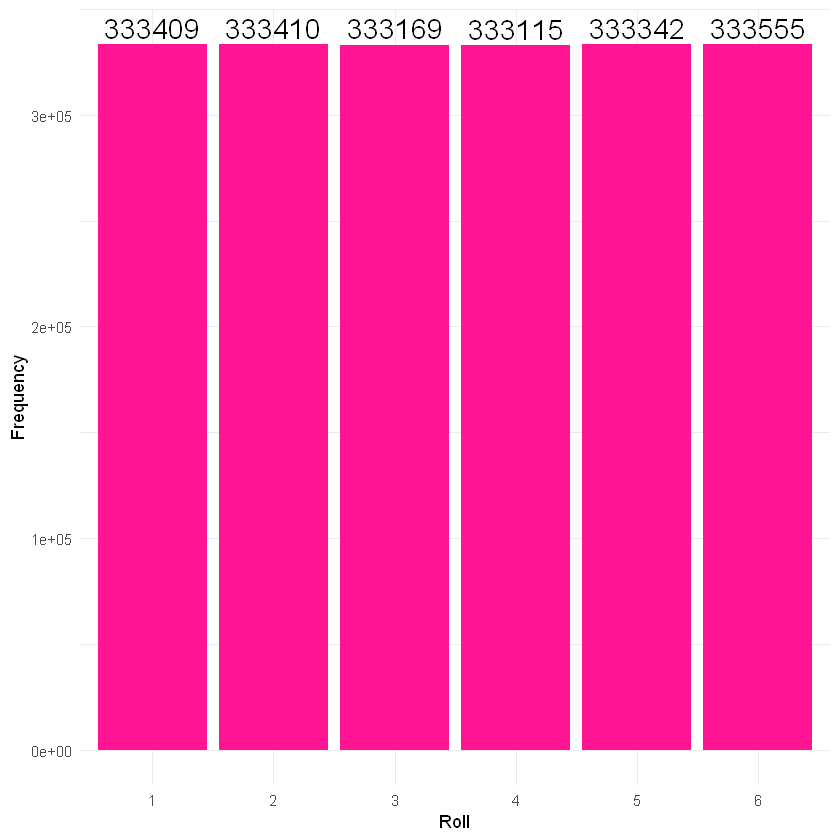

In [8]:
#sampling space for rolling a single fair die
s = c(1,2,3,4,5,6)

#corresponding probabilities
p = 1/6 * replicate(6,1)

#simualate the random experiment of rolling a pair of fair dice
nsimulations = 1e6
simulatedData = replicate(nsimulations,sample(s,size =2, replace = TRUE, prob = p))

#Function to check if  sum of rolls is atleast 7
checkEventGe7 = function(data)
{
    if(sum(data) >= 7){
        return(1)
    }
    return(0)
}

print(paste0('P(Sum of Rolls is atleast 7) = ',mean(apply(simulatedData,2, checkEventGe7))))

#dataframe
df = as.data.frame(table(simulatedData))
colnames(df) = c('Roll','Frequency')

#frequency plot
plot = ggplot(data = df, aes(x = Roll, y = Frequency)) +
    geom_bar(stat = 'identity', fill="deeppink1") +
    geom_text(aes(label = Frequency), vjust = -0.3, size = 6)+
    theme_minimal()
plot



In [9]:
# Sampling space for the faulty-worker problem
s = c('w1', 'w2', 'w3', 'w4', 'w5')

# Corresponding probabilities
p = c(1/5, 1/5, 1/5, 1/5, 1/5)

# Simulate the random experiment of 5 machinists breaking 5 machines
nsimulations = 1e6
simulatedData = replicate(nsimulations, sample(s, size = 5, replace = TRUE, prob = p))

# Function to check if a specific worker breaks at least 4 machines
checkEvent3 = function(data){
unique_workers = unique(data)
for (val in unique_workers){
  if (length(which(data == val)) >= 4){
    return(1)
  }
}  
return(0)
}

# Apply the checkEvent3 functions to each column of simulatedData
#simulatedData
#apply(simulatedData, 2, checkEvent3)
mean(apply(simulatedData, 2, checkEvent3))

[1] 0.033519

In [17]:
data = c('Su', 'Tu', 'We')
#data = c('Fri', 'Sa', 'Su')
# data
# data == 'Sa'
# data == 'Su'
# data == 'Sa' | data == 'Su'
# all(c(1, 1, 0))
# any(c(1, 1, 0))

if (('Su' %in% data) | ('Sa' %in% data)){
  return(0)
}
else {
   return(1)
}



ERROR: Error in parse(text = x, srcfile = src): <text>:13:1: unexpected 'else'
12: }
13: else
    ^


In [18]:
npassengers = 5
s1 = c(1, 0) # 1 corresponds to leaving the bus
p1 = c(0.2, 0.8)
left = sum(sample(s1, size = npassengers, replace = TRUE, prob = p1))
p = array(c(replicate(3, c(0.8, 0.2)), replicate(4, c(0.2, 0.8)), replicate(3, c(0.8, 0.2))), dim = c(2, 10))
p[, 9]

[1] 0.8 0.2

In [ ]:
## Bus-ridership analysis

# Sampling space for leaving the bus
s1 = c(1, 0) # 1 corresponds to leaving the bus
p1 = c(0.2, 0.8)
p = array(c(replicate(3, c(0.8, 0.2)), replicate(4, c(0.2, 0.8)), replicate(3, c(0.8, 0.2))), dim = c(2, 10))

# Sampling space for boarding the bus
s2 = c(0, 1, 2)
p2 = c(0.5, 0.4, 0.1)

# Simulate the number of passengers from stop-1 to stop-10
nstops = 10 # number of stops
npassengers = 0 # number of passengers in the bus initially

# User-defined function for simulating one trial of the bus ride
# through all the stops
simTrial = function(nstops){
# Run through every stop
for (j in 1:nstops){
  # If we have at least one passenger in the bus
  # simulate the leaving process
  if (npassengers > 0){
    left = sum(sample(s1, size = npassengers, replace = TRUE, prob = p1))
    npassengers = npassengers - left
  }
  # Else if no passengers on the bus, then nobody leaves the bus
  else if (npassengers == 0){
    left = 0
  }
  # Simulating the boarding process
  boarded = sample(s2, size = 1, replace = FALSE, prob = p2)
  npassengers = npassengers + boarded
  # Print the status at every stop
  #cat(sprintf('No. of passengers after stop-%d is %d (left = %d, boarded = %d)\n', j, npassengers, left, boarded))
}
return(npassengers)
}

nsimulations = 1e5
simulatedData = replicate(nsimulations, simTrial(nstops))

mean(simulatedData == 0)

[1] 0.05337

In [ ]:
# Scenario: we have 28 students in our class. There
# are 365 different days in a year for a student's birthday.
# What is the probability that at least two students
# have the same birthday

nstudents = 28

# Sampling space
s = c(1:365)

# Corresponding probabilities
n = length(s)
p = (1/n)*replicate(n, 1)

# Simulate the random experiment of assigning birthdays to all students
nsimulations = 1e6
simulatedData = replicate(nsimulations, sample(s, size = nstudents, replace = TRUE, prob = p))
#simulatedData

# Function to check if all birthdays are unique
checkEvent = function(data){
  if (length(unique(data)) == nstudents){
    return(1)
  }
  else{
    return(0)
  }
}

# Probability that all birthdays are unique
mean(apply(simulatedData, 2, checkEvent))

# Probability that at least 2 students share their birthday
1 - mean(apply(simulatedData, 2, checkEvent))


[1] 0.34538

[1] 0.65462

![](https://bl3302files.storage.live.com/y4mLJ61422vc8ZN7yNjFoP6erxQ3vJLXAO8DR8MpnMNowvwiWiJCAvjIaIQIprfd4tH6WF1Cx5-bYKXaCvdT3DAd8n4HopZVWZI9wkFrxsksTON04_fk1sPWwtZN6tEbcpK1KDaAMRqaFjDLj26FhJgXgcATLo7pcl9DLgPJaPNxJOM7laVRMkjAIqCuLklmFYw?width=520&height=200&cropmode=none)

In [19]:
# Sampling space
s = c(1, 0)

# Corresponding probabilities
p = matrix(nrow = 5, ncol = 2, c(0.95, 0.95, 0.9, 0.9, 0.8, 0.05, 0.05, 0.1, 0.1, 0.2))
p

# Simulate the random experiment of the 5 judges making decisions
judgeResult = function(){
  result = numeric(5)
  for (j in c(1:5)){
    result[j] = sample(s, size = 1, replace = TRUE, prob = p[j, ])
  }
  return(result)
}

nsimulations = 1e6
simulatedData = replicate(nsimulations, judgeResult())

# Function to check if the majority decision is incorrect
# which is the same as the court making an incorrect decision
checkEvent = function(data){
  return(sum(data) < 3)
}

# Probability that the court makes an incorrect decision
mean(apply(simulatedData, 2, checkEvent))

0.95,0.05
0.95,0.05
0.90,0.10
0.90,0.10
0.80,0.20


[1] 0.007021

In [20]:
p = matrix(nrow = 5, ncol = 2, c(0.95, 0.95, 0.9, 0.9, 0.8, 0.05, 0.05, 0.1, 0.1, 0.2))
p
p[2, ]
p[, 2]
judgeData = c(1, 0, 1, 0, 0)
judgeData
any(judgeData == 0)
all(judgeData == 0)
tab = table(judgeData)
tab
names(tab)
tab['0']

0.95,0.05
0.95,0.05
0.90,0.10
0.90,0.10
0.80,0.20


[1] 0.95 0.05

[1] 0.05 0.05 0.10 0.10 0.20

[1] 1 0 1 0 0

[1] TRUE

[1] FALSE

judgeData
0 1 
3 2 

[1] "0" "1"

0 
3

In [ ]:
# Sampling space for rolling a single fair die
s = c(1:6)

# Corresponding probabilities
p = (1/6)*c(1, 1, 1, 1, 1, 1)

# Simulate the random experiment of tossing a single fair coin
nsimulations = 1e6
simulatedData = sample(s, size = nsimulations, replace = TRUE, prob = p)

# Create dataframe comprising frequency of each possible outcome in the sample space
#table(simulatedData)
df= as.data.frame(table(simulatedData))
colnames(df) = c('Roll', 'Frequency')
#print(df)

# Frequency plot
p = ggplot(data = df, aes(x = Roll, y = Frequency)) +
  geom_bar(stat = 'identity', fill="steelblue") +
  geom_text(aes(label = Frequency), vjust = -0.3, size = 6)+
  theme_minimal()

p

mean(simulatedData >= 5)

In [ ]:
# Sampling space for rolling a pair of fair dice
s = c(1:6)

# Corresponding probabilities
p = (1/6)*c(1, 1, 1, 1, 1, 1)

# Simulate the random experiment of rolling a pair of fair dice 
nsimulations = 1e6
simulatedData = replicate(nsimulations, sample(s, size = 2, replace = TRUE, prob = p))

# Function to check if the sum of the rolls is at least 7
checkEvent2 = function(data){
  if (sum(data) >= 7){
    return(1)
  }
  else{
    return(0)
  }
}

# Probability that the sum of the rolls is at least 7
mean(apply(simulatedData, 2, checkEvent2))

In [ ]:
data = c(1, 2, 2, 2, 4, 5)
which(data == 2)

[1] 2 3 4

In [ ]:
# Sampling space for ice-cream selection
S = c('vanilla', 'pista', 'strwaberry', 'chocolate', 'blackberry',
 'blueberry', 'mango', 'sitaphal', 'chickoo', 'jack fruit')

# Corresponding probabilities
n = length(S)
p = (1/n)*replicate(n, 1)

# Samples representing outcomes of the experiment of selecting 3 objects from
# the sampling space with replacement - this corresponds to generating outcomes
# of the random experiment of selecting 3 flavors from the 10 available
#set.seed(1)
simulationSize = 1e05
#sample(S, size = 3, replace = TRUE, prob = p)
simulatedData = replicate(simulationSize, sample(S, size = 3, replace = TRUE, prob = p))
#print(simulatedData)
#apply(simulatedData, 2, unique)
#lengths(apply(simulatedData, 2, unique))
#lengths(apply(simulatedData, 2, unique)) == 3
#mean(lengths(apply(simulatedData, 2, unique)) == 3)

# Approximate probability of getting 3 distinct flavors
print(mean(lengths(apply(simulatedData, 2, unique)) == 3))

[1] 0.72043


In [ ]:
(choose(6,3)*choose(6,2)*choose(4,2)*choose(2,2))/(6^6)
(choose(6,1)*5^2*choose(6,4))/(6^6)
(choose(5,4)*choose(4,1)+choose(5,5))/(5^5)

In [ ]:
# Sampling space for rolling a single fair die
S = c(1:6)

# Corresponding probabilities
p = (1/6)*c(1, 1, 1, 1, 1, 1)

# Simulate outcomes of the random experiment of rolling 6 fair dice
nsimulations = 1e06
simulatedData = replicate(nsimulations, sample(S, size = 6, replace = TRUE, prob = p))

# Function to check if 3 numbers appear twice each
checkEvent = function(data){
    unique_numbers = unique(data) # collecting all the unique values occured
    for (val in unique_numbers){
      if (sum(val == data) != 2){
        return(0)
      }
    }    
    return (1)
}
approximate_probability = mean(apply(simulatedData, 2, checkEvent))
cat("Approximate probability of 3 numbers appearing twice each is ", approximate_probability, '\n')

In [ ]:
# Sampling space for rolling a pair of fair dice
s = c(1:6)

# Corresponding probabilities
p = (1/6)*c(1, 1, 1, 1, 1, 1)

# Simulate the random experiment of rolling a pair of fair dice 
nsimulations = 1e6
simulatedData = replicate(nsimulations, sample(s, size = 2, replace = TRUE, prob = p))
#simulatedData

# Function to check if the sum of the rolls is at least 7 and that the
# first roll is even
checkEvent2 = function(data){
  if ((sum(data) >= 7) && (data[1] %%2 == 0)){
    return(1)
  }
  else{
    return(0)
  }
}
#simulatedData
#apply(simulatedData, 2, checkEvent2)
# Probability that the sum of the rolls is at least 7 and that the the first roll is even
mean(apply(simulatedData, 2, checkEvent2))

[1] 0.333547

In [ ]:
# Sampling space for rolling a pair of fair dice
s = c(1:6)

# Corresponding probabilities
p = (1/6)*c(1, 1, 1, 1, 1, 1)

# Simulate the random experiment of rolling a pair of fair dice 
nsimulations = 1e6
simulatedData = replicate(nsimulations, sample(s, size = 2, replace = TRUE, prob = p))
#simulatedData
# Function to check if the first roll is even
checkEvent2 = function(data){
  if (data[1] %%2 == 0){
    return(1)
  }
  else{
    return(0)
  }
}

# Probability that the the first roll is even
#apply(simulatedData, 2, checkEvent2)
mean(apply(simulatedData, 2, checkEvent2))

In [ ]:
# Sampling space for rolling a pair of fair dice
s = c(1:6)

# Corresponding probabilities
p = (1/6)*c(1, 1, 1, 1, 1, 1)

# Simulate the random experiment of rolling a pair of fair dice 
nsimulations = 1e6
simulatedData = replicate(nsimulations, sample(s, size = 2, replace = TRUE, prob = p))

# Function to check if the first roll is even
checkEventEven = function(data){
  if ((data[1] %% 2) == 0){
    return(TRUE)
  }
  else{
    return(FALSE)
  }
}

# Function to check if the sum of the rolls is at least 7
checkEventGeq7 = function(data){
  if (sum(data) >= 7){
    return(1)
  }
  else{
    return(0)
  }
}

# Get columns of simulatedData in which the first roll is even
# and then apply the function to check if the sum of the rolls
# is at least 7
#-------------------------------------------------
# Uncomment the following lines and see the output
#simulatedData
#apply(simulatedData, 2, checkEventEven)
#simulatedData[, apply(simulatedData, 2, checkEventEven)]
#apply(simulatedData[, apply(simulatedData, 2,  checkEventEven)], 2, checkEventGeq7)
#-------------------------------------------------

# Probability that the sum of the rolls is seven given that the first roll is even
mean(apply(simulatedData[, apply(simulatedData, 2,  checkEventEven)], 2, checkEventGeq7))

[1] 0.6665867